In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Being an immigrant who came to Canada for university in 2018, it has always been of interest to me to explore more in-depth statistics on immigration numbers and trends in Canada. However, the COVID-19 pandemic increased my interest in this topic, because the immigration data was obviously influenced by this unprecedent event. This brief report will talk on overall recent immigration data and tendencies, with particular focus on data related to international students and immigrants landed less than 5 years ago. The topics discussed will be Canadian population growth rate, home regions of international students who are currently completing any kind of International Standard Classification of Education (ISCED) in Canada, unemployment tendencies of immigrants compared to those born in Canada and employment data on immigrants landed less than 5 years ago based on educational background and gender. The data was obtained from Satistics Canada website. Python programming language was used to tackle a data preprocessing and graphing part.

Part 1. Components of population growth

This dataset contains the information about a number of births, deaths, immigrants and emigrants from 1989 to 2021. We can observe constant increase in deaths and decrease in births from early 1990s to early 2000s and from 2015 to current time. While immigration curve is pretty volatile, both immigration and emigration numbers dropped during COVID-19, but immigration number experienced more rapid decrease. 

In [3]:

import pandas as pd
df1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chatbot new/canada immigration/demogrowth111.csv')
df1.head()


,Years,Births,Deaths,Immigrants,Emigrants,Returning emigrants,Net temporary emigrants,Net interprovincial migration,Net non-permanent residents,Residual deviation
0,1989,384035,188408,177632,40395,14087,0,0,140748,2665
1,1990,403280,192608,203357,39760,13926,0,0,28829,2667
2,1991,402929,192439,221382,43692,15208,0,0,-52853,4253
3,1992,403107,196967,244281,45633,15899,19741,0,-42919,24183
4,1993,392181,201808,266890,43993,15279,19744,0,-71185,24120


In [4]:
import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

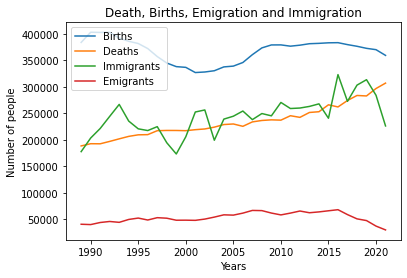

In [ ]:
df2 = df1.iloc[:, 0:5]

plt.figure()
df2.plot(x ='Years', y = ['Births ', 'Deaths ', 'Immigrants ', 'Emigrants '] )
plt.xlabel("Years")
plt.ylabel("Number of people")
plt.title("Death, Births, Emigration and Immigration")
plt.legend()

plt.show()



It is also interesting to observe the overall population growth tendency. For simplicity in calculation, only birth, immigration, death and emigration were considered, with all other groups being relatively small in numbers and not influencing overall situation. The growth was calculated as follows:  population growth = Births + Immigration - Deaths - Emigration.

The rapid decrease in population growth can be observed during 1990s, but most importantly we can see a sharp decrease during COVID-19 pandemic. During 2020-2021 period, deaths increased by 10212, births decreased by 10803, emigration decreased by 7222 and immigration decreased by 57954 person. This highlights the importance of immigration as a factor of Canadian Population growth and shows the sequence of COVID-19 pandemic followed from closure of borders. 


Text(0.5, 1.0, 'Population growth')

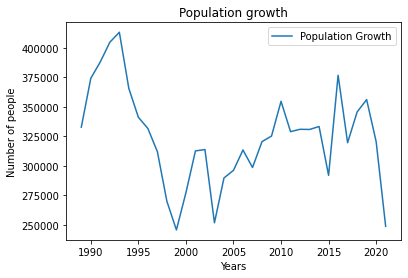

In [ ]:
#birth + immigration - death - Emigrants
import numpy as np

BID = list(df2['Births '] + df2['Immigrants '] - df2['Deaths '] - df2['Emigrants '])
yearss = list(np.arange(1989,2022,1))
data = {'Years': yearss, 'Population Growth': BID}
data1 = pd.DataFrame(data)
data1.plot('Years', 'Population Growth')
plt.xlabel("Years")
plt.ylabel("Number of people")
plt.title("Population growth")


In [ ]:
df2['Deaths '][32] - df2['Deaths '][31]

10212

In [ ]:
df2['Emigrants '][32] - df2['Emigrants '][31]

-7222

In [ ]:
df2['Births '][32] - df2['Births '][31]

-10803

In [ ]:
df2['Immigrants '][32] - df2['Immigrants '][31]

57954

Part 2. Total, International Standard Classification of Education (ISCED) by citizenship of home region

Next, a brief analysis of where international students completing any kind of ISCED in Canada came from in 2011-2020 time period. The data takes into account any student enrolled in ISCED during a given year.



It can be noticed that the presence of international students from every part of the world increased over the time, with international students from Asia experiencing the most rapid growth from 142170 students in 2011 to 388782 ones in 2020. 

Based on the visualization by a bar chart, the propotion of international students from Asia relative towards total number of international students grew from 55% in 2011 to slightly above 70% in 2020.

Text(0.5, 1.0, 'International students by home region citizenship')

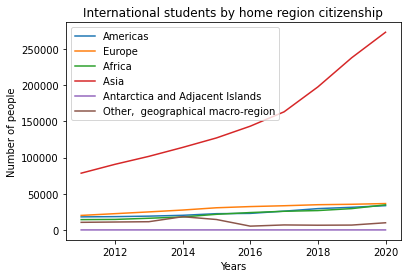

In [ ]:
df3 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chatbot new/canada immigration/totalintern.csv')
df3.rename({'Americas  [': 'Americas'}, axis=1, inplace=True)

#line graph
df3.plot(x ='Year', y = [
 'Americas',
 'Europe  ',
 'Africa  ',
 'Asia  ',
 'Antarctica and Adjacent Islands  ',
 'Other,  geographical macro-region'] )

plt.xlabel("Years")
plt.ylabel("Number of people")
plt.title("International students by home region citizenship")

Text(0.5, 1.0, 'International students by home region citizenship')

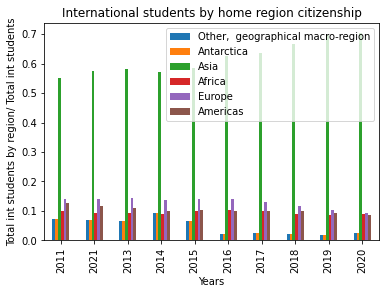

In [ ]:
#barplot
#international students only
data = {'Other,  geographical macro-region': list(df3['Other,  geographical macro-region']/df3['Total']),
        'Antarctica': list(df3['Other,  geographical macro-region']/df3['Total']),
        'Asia': list(df3['Asia  ']/df3['Total']), 'Africa': list(df3['Africa  ']/df3['Total']),
        'Europe': list(df3['Europe  ']/df3['Total']),
        'Americas': list(df3['Americas']/df3['Total'])
        }

data1 = pd.DataFrame(data, index = [2011,2021,2013,2014,2015,2016,2017,2018,2019,2020])
data1.plot(kind = 'bar')

plt.xlabel("Years")
plt.ylabel("Total int students by region/ Total int students")
plt.title("International students by home region citizenship")

Part 3. Unemployment 3-month moving average based on immigrant status

This dataset contains data about 3-month unemployment moving average based on immigrant status from June,2010 to June,2021. 

For total number of unemployed in Canada, we can see a seasonal volatilities throughout the time frame and great spike caused by pandemic, which is not surprising. However, investigation on the contribution of each immigrant status group is an interesting thing to be explored.

In terms of number of people affected by COVID-19 that resulted into unemployment, the trend is the same across all immigrant groups, until the November 2020. After this month, the number of born in Canada unemployed steadily went down, whereas for four immigrant groups this number either stays the same or slightly fluctuates. This might be just a seasonal adjustment or a result of higher number of unemployed that were born in Canada, however, when more data is available, this trend is worth investigating it. 



Text(0.5, 1.0, 'Unemployed, total')

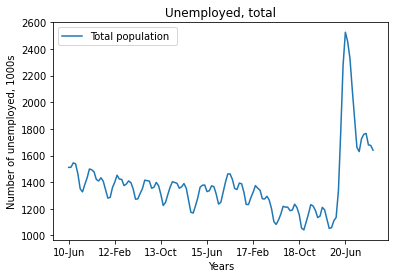

In [ ]:
df4 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chatbot new/canada immigration/emp.csv')
df4.columns
#unemployment graph
df4.plot('Month', 'Total population ')

plt.xlabel("Years")
plt.ylabel("Number of unemployed, 1000s")
plt.title('Unemployed, total')

Text(0.5, 1.0, 'Proportion of unemployed based on a immigrant status')

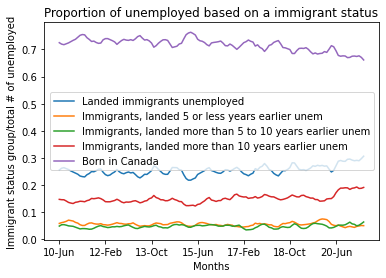

In [ ]:
m = {'Months': (df4['Month'])}
m1 = list(df4['Month'])



dat1 = {'Landed immigrants unemployed': list(df4['Landed immigrants ']/df4['Total population ']),
        'Immigrants, landed 5 or less years earlier unem': list(df4['Immigrants, landed 5 or less years earlier']/df4['Total population ']),
        'Immigrants, landed more than 5 to 10 years earlier unem': list(df4['Immigrants, landed more than 5 to 10 years earlier']/df4['Total population ']),
        'Immigrants, landed more than 10 years earlier unem': list(df4['Immigrants, landed more than 10 years earlier']/df4['Total population ']),
        'Born in Canada': list(df4['Born in Canada']/df4['Total population '])}

data11 = pd.DataFrame(dat1)

data11.insert(1, 'Month', m1)
data11.columns
data11.plot(x = 'Month', y = ['Landed immigrants unemployed','Immigrants, landed 5 or less years earlier unem',
                      'Immigrants, landed more than 5 to 10 years earlier unem',
                     'Immigrants, landed more than 10 years earlier unem', 'Born in Canada'])


plt.xlabel("Months")
plt.ylabel("Immigrant status group/total # of unemployed")
plt.title('Proportion of unemployed based on a immigrant status')

Text(0.5, 1.0, 'Number of unemployed based on a immigrant status')

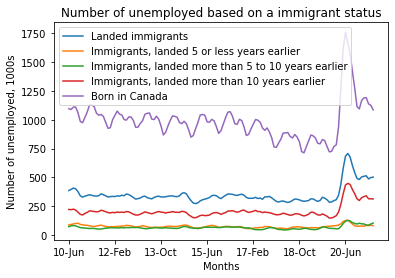

In [ ]:
df4.plot('Month', ['Landed immigrants ', 'Immigrants, landed 5 or less years earlier',
                   'Immigrants, landed more than 5 to 10 years earlier',
                   'Immigrants, landed more than 10 years earlier',
                   'Born in Canada'])
plt.xlabel("Months")
plt.ylabel("Number of unemployed, 1000s")
plt.title('Number of unemployed based on a immigrant status')

Part 4. Immigrants landed 5 years or earlier. Employment based on education background

Latsly, the report will investigate a data on landed immigrants within last 5 years based on educational background as well as gender.

To begin with, for all genders it can be seen that university degree and post-seconday certificate or diploma are undoutably the most employed categories. Interesting fact is that during the COVID-19 employment among university graduates didn't experience a steady decrease, whereas other categories' employment dropped significantly. This is likely to be the result that people with university degree were more flexible to move to work from home and hence there were less dismissals in this category. 

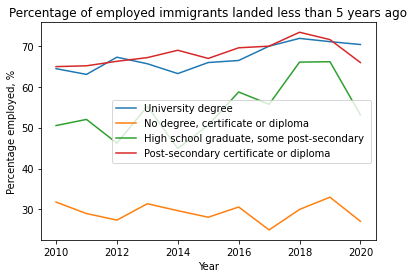

In [5]:
#employment of < 5 year immigrants, both sexes
df5 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chatbot new/canada immigration/bothsexes.csv')
df5.plot('Year', ['University degree ', 'No degree, certificate or diploma ',
                  'High school graduate, some post-secondary ',
                  'Post-secondary certificate or diploma '])

plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('Percentage of employed immigrants landed less than 5 years ago')
plt.legend(loc = 'best')

Now, we come to a comparison between Male and Female landed immigrants within last 5 years. 

From below graphs, similar shapes can be noticed. However, it comes with tremendous difference in employment between males and females for every category of educational background. For example, the average employed university graduates difference between males and females for last 10 years was 19.7% and for all educational backgrounds the same number was 19.62%, which is surprisingly large difference. Graphs below illustrate this.



Text(0.5, 1.0, 'Percentage of employed immigrants landed less than 5 years ago, Male')

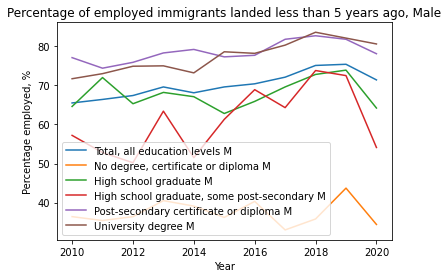

In [6]:
df_m = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chatbot new/canada immigration/male5yrs.csv')
df_m.columns
df_m.plot('Year', ['Total, all education levels M',
       'No degree, certificate or diploma M', 'High school graduate M',
       'High school graduate, some post-secondary M',
       'Post-secondary certificate or diploma M', 'University degree M'])

plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('Percentage of employed immigrants landed less than 5 years ago, Male')

Text(0.5, 1.0, 'Percentage of employed immigrants landed less than 5 years ago, Female')

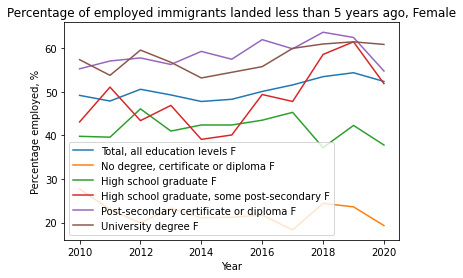

In [7]:
df_f = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/chatbot new/canada immigration/female5yrs.csv')
df_f.plot('Year', ['Total, all education levels F',
       'No degree, certificate or diploma F', 'High school graduate F',
       'High school graduate, some post-secondary F',
       'Post-secondary certificate or diploma F', 'University degree F'])

plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('Percentage of employed immigrants landed less than 5 years ago, Female')

In [10]:
df_merged = pd.merge(df_f, df_m, on = 'Year')

19.62727272727273


Text(0.5, 1.0, 'M and F in percentage of employed for this group for all educational backgrounds')

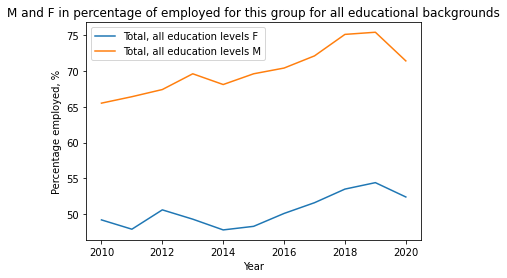

In [11]:
df_merged.plot(x = 'Year', y = ['Total, all education levels F', 'Total, all education levels M'])
print(sum(df_merged['Total, all education levels M'] - df_merged['Total, all education levels F'])/len(df_merged['Total, all education levels M'] - df_merged['Total, all education levels F']))

plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('M and F in percentage of employed for this group for all educational backgrounds')

19.7


Text(0.5, 1.0, 'M and F in percentage of employed for this group for university degree')

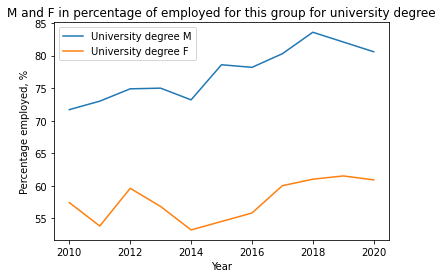

In [12]:
df_merged.plot(x = 'Year', y = ['University degree M', 'University degree F'])
print(sum(df_merged['University degree M'] - df_merged['University degree F'])/len(df_merged['University degree M'] - df_merged['University degree F']))
plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('M and F in percentage of employed for this group for university degree')

Text(0.5, 1.0, 'M and F difference in percentage of employed for this group for university degree')

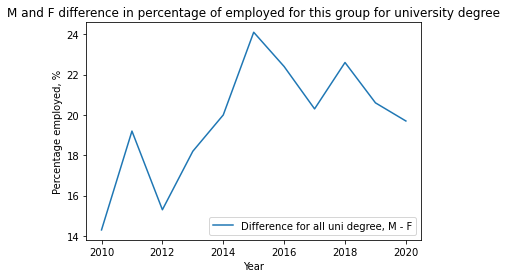

In [13]:
df111 = df_merged
df111['Difference for all uni degree, M - F'] = df111['University degree M'] - df111['University degree F']
df111.plot('Year', 'Difference for all uni degree, M - F')
plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('M and F difference in percentage of employed for this group for university degree')

Text(0.5, 1.0, 'M and F difference in percentage of employed for this group for all degrees')

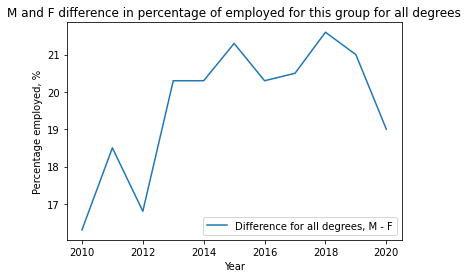

In [14]:
df111['Difference for all degrees, M - F'] = df111['Total, all education levels M'] - df111['Total, all education levels F']
df111.plot('Year', 'Difference for all degrees, M - F')
plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('M and F difference in percentage of employed for this group for all degrees')

Text(0.5, 1.0, 'M and F difference in percentage of employed for this group for certificates or diploma degrees')

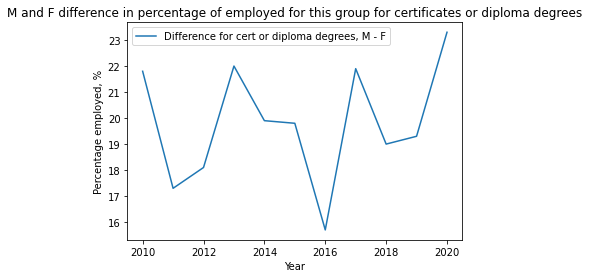

In [15]:
df111['Difference for cert or diploma degrees, M - F'] = df111['Post-secondary certificate or diploma M'] - df111['Post-secondary certificate or diploma F']
df111.plot('Year', 'Difference for cert or diploma degrees, M - F')
plt.xlabel("Year")
plt.ylabel("Percentage employed, %")
plt.title('M and F difference in percentage of employed for this group for certificates or diploma degrees')

Finally, there are some findings for differences in male and female employment for different educational backgrounds. While difference in all types of degrees and university degrees for both genders are positively correlated (meaning that the bigger the difference between males and females employed, the bigger is the difference between the males and females of all degrees employed), there is actually no correlation for the same differences for certificate or diploma holders and all other degrees. Moreover, these differences are negatively correlated for university degrees and college or certificate ones. That's said, the bigger the difference between males and females with university degree employed, the lower is this gap for college or certificate degree holders. This pattern looks interesting and is worth further investigation. 

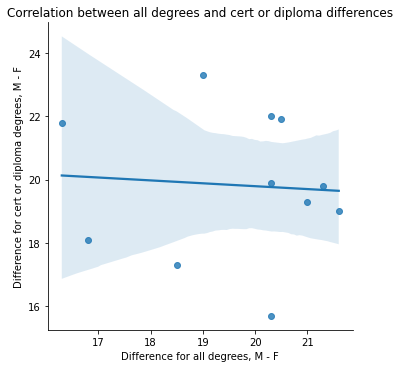

In [22]:
#df111.plot('Difference for all degrees, M - F', 'Difference for cert or diploma degrees, M - F', kind = 'scatter')
import seaborn as sns
ax = sns.lmplot(x='Difference for all degrees, M - F',y='Difference for cert or diploma degrees, M - F',data=df111,fit_reg=True) 
ax.set(title = 'Correlation between all degrees and cert or diploma differences')
plt.show()

#NO CORRELATION

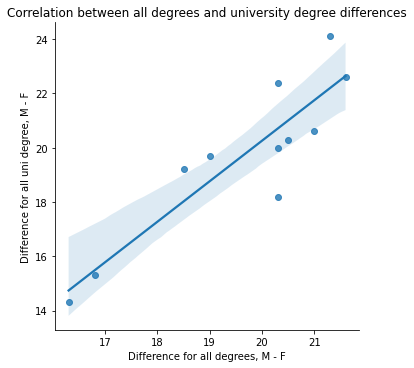

In [23]:
#df111.plot('Difference for all degrees, M - F', 'Difference for all uni degree, M - F', kind = 'scatter')
ax = sns.lmplot(x='Difference for all degrees, M - F',y='Difference for all uni degree, M - F',data=df111,fit_reg=True) 
ax.set(title = 'Correlation between all degrees and university degree differences')
plt.show()

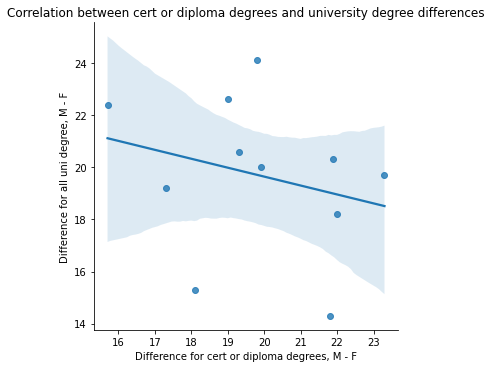

In [24]:
ax = sns.lmplot(x='Difference for cert or diploma degrees, M - F',y='Difference for all uni degree, M - F',data=df111,fit_reg=True) 
ax.set(title = 'Correlation between cert or diploma degrees and university degree differences')
plt.show()
#INTERESTING

Conclusion

Overall, this brief report can be used as a base for investigating further tendencies for Canadian immigration and COVID-19 influence on it. Especially interesting it will be to look at when uneployment level for landed immigrants and individuals born in Canada comes back to pre-COVID-19 level and how Canadian government will stimulate the immigration to return to pre-COVID-19 numbers. Based on the beginning of the report, it will eventually happen, because the immigration plays a crucial role in Canadian population growth based on these numbers.

The most interesting findings of this report are the following ones:
- During 2020, deaths increased by 10212, births decreased by 10803, emigration decreased by 7222 and immigration decreased by 57954 person compared to 2019. Immigration significantly decreased due to border closures and this number highlights its importance for Canadian population growth;
- The propotion of international students from Asia in Canada grew from 55% in 2011 to slightly above 70% in 2020;
- COVID-19 affected all landed immigrants groups and those born in Canada in pretty much similar way, i.e. the tendencies for unemployment figures are the same;
- Difference between employment for landed immigrants within last 5 years for males and females for last 10 years based on education is tremendously huge, with this number reaching 19.62% for all educational backgrounds;
- The bigger the difference between males and females with university degree employed, the lower is this gap for college or certificate degree holders for landed immigrants within last 5 years.